In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import re
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

np.set_printoptions(threshold=np.inf)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
"""
实现：
#保存数据，将0-1之外的元素更新为0和1,并重新保存数据,将all_label.npy保存为all_label_repair01.npy

"""


In [34]:
# 直接加载npy文件为numpy格式
all_data = np.load('../data/all_data.npy')
# #直接加载npy文件为numpy格式
all_label = np.load('../data/all_label.npy')

all_data = torch.tensor(all_data).float()
all_label = torch.tensor(all_label).float()


In [3]:
print(all_data.shape)
print(all_label.shape)

torch.Size([192000, 2, 64, 64])
torch.Size([192000, 4, 64, 64])


In [36]:
# 将大于1的元素改为1，小于0的元素改为0
all_label = np.where(all_label < 0, 0, all_label)

In [37]:
all_label = np.where(all_label > 1, 1, all_label)

In [ ]:

# 打印修改后的数据
print(all_label[0,0])

In [ ]:
# 统计为0和1的个数
count_zero = np.count_nonzero(all_label == 0)
count_one = np.count_nonzero(all_label == 1)

# 打印统计结果
print("0的个数：", count_zero)
print("1的个数：", count_one)
print(192000*64*64*4)

In [39]:
"""统计更改后0-1的数量，这个每隔1w个样本统计一下1w样本里0,1的个数"""

count_label_0 = []
count_label_1 = []
interval = 10000
for i in range(0,192001,interval):
    count_zero = np.count_nonzero(all_label[i:i+interval] == 0)
    count_one = np.count_nonzero(all_label[i:i+interval] == 1)
    if count_zero>0:
        count_label_0.append(count_zero)
    if count_one>0:
        count_label_1.append(count_one)
print(count_label_0)  
print(count_label_1)

[8075983, 7737157, 8071765, 8043031, 7934057, 7969469, 8144492, 8099850, 8113342, 7980639, 7915893, 7957480, 8184116, 8011085, 8089072, 7972588, 8010083, 8033865, 7973523, 1597068]
[8063938, 7725497, 8069725, 8039934, 7936082, 7967047, 8135717, 8092037, 8117841, 7989290, 7930367, 7951666, 8183124, 8000554, 8088450, 7969063, 8019716, 8019804, 7976393, 1592559]


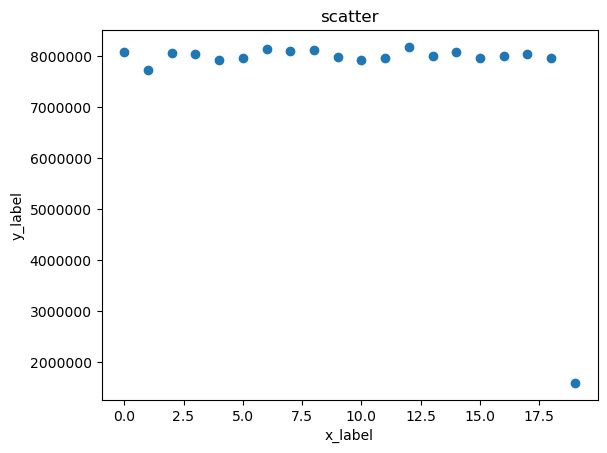

In [43]:
import matplotlib.pyplot as plt   #导入包
fig = plt.figure()              #创建空图
x_label = [i for i in range(len(count_label_0))]     #x轴的坐标
y_label = count_label_0
y1_label = count_label_1
plt.scatter(x_label,y_label)  #构建散点图，可以设置点颜色属性
# plt.scatter(x_label,y1_label)  #构建散点图，可以设置点颜色属性
plt.title("scatter")                 #设置标题，这里只能显示英文，中文显示乱码
plt.ylabel("y_label")            #设置y轴名称
plt.xlabel("x_label")            #设置x轴名称
plt.show()  

In [ ]:
#保存数据，将0-1之外的元素更新为0和1,并重新保存数据
# np.save('../data/all_label_repair01.npy', all_label)